<a href="https://colab.research.google.com/github/Ilanthenral/NCM/blob/main/Final_NCM_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instructions


1. For Indeterminacy entry use **J**
2. Change the values in the last cell to test in the colab notebook.
3. Also, to get dynamic input form the user use the **start()** function.
4. Dynamic input will not work in notebook for this we need to separate the code into **.py** files.

In [ ]:
# Importing necesssary libraries
import numpy as np

# To handle indeterminate variable value in matrix
import sympy as sym
from sympy import *
J=symbols('J')  # We are using 'J' to indicate that the value is indeterminate

import random

In [ ]:
"""
  Check whether a cycle of state vector exists or not.
 i.e To check whether we are getting a previously calculated
 state vector or not after applying threholding operation.

  Function Parameters:
    b : a 1D vector array
"""

def check_cycle(b) :
  for i in range(len(b) - 1) :
    for j in range(i + 1 , len(b)) :
      v1 = b[i]
      v2 = b[j]
      if(compare(v1 , v2) == True) :
        return True
  return False


In [ ]:
"""
  Comparing whether two state vectors are equal or not.

  Function Parameters:
    x, y : a 1D vector array
"""
def compare(x , y) :

  res = True

  for k in range(len(x)) :

    if x[k] != y[k] :
      return False

  return True


In [ ]:
v2=[]

In [ ]:
"""
A function to accept user input for adjacency/connection matrix.
This function accepts the matrix input in row-wise manner.

"""

def inputE():

  # Taking the number of nodes.
  n=int(input("Enter the number of nodes required:"))

  matrix = sym.Matrix()

  row=[]

  # Taking row-wise input for the matrix.
  for i in range (0,n):

    string = input("Enter elements (Space-Separated): ")
    temp = string.split()
    print(type(temp))
    temp=[eval(i) for i in temp] #to int
    v1=np.array(temp)
    print(v1)

    v2.append
    row.append(temp)

# Inserting each row into matrix.
  for i in range(0,n):
    matrix = matrix.row_insert(i,Matrix([row[i]]))

  return matrix

In [ ]:
"""
 Multipying a vector with matrix

 Function Paramerts:
   a : a 1D vector
   B : a 2D matrix
"""
def multiply(a, B) :
  result = a * B
  #print(result)
  return result

In [ ]:
def updateIPower(x):
  for i in range((np.shape(x))[1]):

    if x[i].find(J**2):
      x[i]=x[i].xreplace({J**2:J})
  return x

In [ ]:
"""
Performing the thresholding operation.

Function Parameters:
  X : a 1D vector
  threshold_value : an integer (threshold value to make necessary updation )
"""
def thresholdAndUpdate(X , threshold_value, state) :
  #print(X)
  X=updateIPower(X)
  for i in range((np.shape(X)[1])):
      if(X[i].find(-1)):
        X[i]=0
      temp_expr=X[i].subs(J,0)
      if(temp_expr>=threshold_value):
        X[i]=X[i].subs(X[i],threshold_value)
      elif(temp_expr==0):
        if(X[i].find(J)):
          X[i]=J
      else:
        X[i]=X[i].subs(X[i],0)
  if isinstance(state, list):
    activated_states = [i for i, x in enumerate(state) if x == 1]
    for s in activated_states:
      X[s] = 1
  else:
    X[state - 1] = 1
  #print("After Thresholding and Updating", X)
  return X

In [ ]:
"""
Performing the iterative operations of multiplication & thresholding.

Function Parameters:
  E : Adjaency/Connection matrix
  threshold_value : an integer
  state : an integer denoting which state to activate
"""
def iteration(E , state, threshold_value = 1) :
    if isinstance(state, list):
        start = sym.Matrix(state)
    else:
        c1 = np.zeros((np.shape(E)[1]))
        c1[state - 1] = 1
        start = sym.Matrix(c1)

    flag = False
    start = start.T
    vectors = []
    while flag == False :
      y = multiply(start , E)
      y = y.applyfunc(lambda x: round(x, 2) if x.is_number else x)
      #print(y)
      # Performing the thresholding operation on output vector y
      y = thresholdAndUpdate(y , threshold_value, state)
      #print("After Thresholding and Updating" )
      #print(y)
      vectors.append(y)
      # Updating start vector to start with new state vector
      start = y
      # Checking for cycle among state vectors
      flag = check_cycle(vectors)
    return vectors

In [ ]:

from itertools import combinations

def generate_two_on_states(num_nodes):
    """
    Funtion Parameters:
        num_nodes (int): The total number of nodes in the NCM.
    """
    node_indices = list(range(num_nodes))
    two_on_combinations = list(combinations(node_indices, 2))
    state_vectors = []
    for combo in two_on_combinations:
        vector = [0] * num_nodes
        for index in combo:
            vector[index] = 1
        state_vectors.append(vector)
    return state_vectors


In [ ]:
import networkx as nx
import graphviz
from IPython.display import display
def start2() :
  #E=inputE()
  E= Matrix([
     [0, -1, 'J', 1, 0, 1, 0],
     [0, 0, 0, 0, 1, 0, 1],
     [0, 0, 0, 0, 1, 1, 0],
     [0, 'J', 0, 0, 0, 0, -1],
     [0, 0, 0, 0, 0, 0, -1],
     [1, 1, 0, 0, 0, 0, 'J'],
     [0, 0, 1, 0, 0, 0, 0]
    ])

  # E = E.applyfunc(lambda x:round(x/5, 2) if x.is_number else x)#Comment this if normalization is not required for the matrix
  print("The E matrix is : ")
  print(E)

  #Graph
  G = nx.MultiDiGraph()
  mapping = {i + 1: f'C{i + 1}' for i in range(E.shape[0])}

  # mapping = {
  #   1: 'M',
  #   2: 'A1',
  #   3: 'B1',
  #   4: 'C1',
  #   5: 'D1',
  #   6: 'E1',
  #   7: 'F1',
  #   8: 'G1',
  #   9: 'H1',
  #   10: 'I1'
  # }

  for i in range(E.shape[0]):
      for j in range(E.shape[1]):
          if E[i, j] != 0:
              weight = 'I' if E[i, j] == Symbol('J') else E[i, j] #Enclose the else part with float() if the elements in the matrix are float
              G.add_edge(i + 1, j + 1, weight=weight)

  G = nx.relabel_nodes(G, mapping)
  dot = graphviz.Digraph(comment='My Graph', format='png', graph_attr={'rankdir': 'LR'})

  for node in G.nodes():
      dot.node(node)

  for u, v, data in G.edges(data=True):
      label = f'{data["weight"]:.2f}' if isinstance(data["weight"], float) else str(data["weight"])
      dot.edge(u, v, label=label)

  dot.render('graph_output', view=True, cleanup=True, engine='dot', format='png', renderer='cairo')
  display(dot)

  print("Enter the threshold value : ")
  threshold_value = 1 #int(input())

  print("Enter the state which is to be active (If an iteration of all states active one by one enter 0): ")
  state = 0 #int(input())

  if state > (np.shape(E)[1]) or state < 0:
    print("INVALID STATE ENTERED")

  elif state != 0:
    AE = iteration(E , state, threshold_value )
    print(AE)

  else :
    table = []

    for x in range(1 , (np.shape(E)[1]) +1 ) :
      print("FOR ACTIVE STATE " , x)
      AE = iteration(E , x , threshold_value)
      print("Resultant vector(s)", AE)
      table.append(AE)

    print("FULL TABLE")
    print(table)



# G.add_edge(1,1,weight=1)
# G.add_edges_from([(1, 7), (2, 1), (2, 2), (2, 3),
#               (2, 6), (3, 5), (4, 3), (5, 4), (5, 8),
#               (5, 9), (6, 4), (7, 2), (7, 6), (8, 7)])

# plt.figure(figsize =(9, 9))
# nx.draw_networkx(G, arrows = True, node_color ='green')

# # getting different graph attributes
# print("Total number of nodes: ", int(G.number_of_nodes()))
# print("Total number of edges: ", int(G.number_of_edges()))
# print("List of all nodes: ", list(G.nodes()))
# print("List of all edges: ", list(G.edges()))
# pr
# print("List of all nodes from which we can go to node 2 in a single step: ",
#                                                   list(G.predecessors(2)))
# G.add_edge("a", "b", weight=0.6)
# G.add_edge("a", "c", weight=0.2)
# G.add_edge("c", "d", weight=0.1)
# G.add_edge("c", "e", weight=0.7)
# G.add_edge("c", "f", weight=0.9)
# G.add_edge("a", "d", weight=0.3)

# elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
# esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]


    print("\n\n\n")
    user_choice = input("Do you want to proceed with combinations logic for initial state vectors with two 'ON' nodes? (yes/no): ")
    if user_choice.lower() == 'yes':
      two_on_states = generate_two_on_states(np.shape(E)[1])
      table = []
      for state_vector in two_on_states:
          print("Activating state:", state_vector)
          AE = iteration(E, state_vector, threshold_value)
          print(AE)
          table.append(AE)
      print("FULL TABLE FOR COMBINATIONS")
      print(table)

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)


The E matrix is : 
Matrix([[0, -1, J, 1, 0, 1, 0], [0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 1, 1, 0], [0, J, 0, 0, 0, 0, -1], [0, 0, 0, 0, 0, 0, -1], [1, 1, 0, 0, 0, 0, J], [0, 0, 1, 0, 0, 0, 0]])


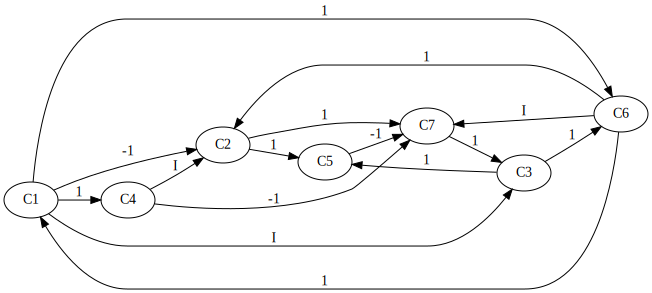

Enter the threshold value : 
Enter the state which is to be active (If an iteration of all states active one by one enter 0): 
FOR ACTIVE STATE  1
Resultant vector(s) [Matrix([[1, 0, J, 1, 0, 1, 0]]), Matrix([[1, J, J, 1, J, 1, 0]]), Matrix([[1, J, J, 1, J, 1, 0]])]
FOR ACTIVE STATE  2
Resultant vector(s) [Matrix([[0, 1, 0, 0, 1, 0, 1]]), Matrix([[0, 1, 1, 0, 1, 0, 0]]), Matrix([[0, 1, 0, 0, 1, 1, 0]]), Matrix([[1, 1, 0, 0, 1, 0, J]]), Matrix([[0, 1, J, 1, 1, 1, 0]]), Matrix([[1, 1, 0, 0, 1, J, 0]]), Matrix([[J, 1, J, 1, 1, 1, J]]), Matrix([[1, 1, J, J, 1, J, 0]]), Matrix([[J, 1, J, 1, 1, 1, 0]]), Matrix([[1, 1, J, J, 1, J, 0]])]
FOR ACTIVE STATE  3
Resultant vector(s) [Matrix([[0, 0, 1, 0, 1, 1, 0]]), Matrix([[1, 1, 1, 0, 1, 1, 0]]), Matrix([[1, 0, 1, 1, 1, 1, J]]), Matrix([[1, J, 1, 1, 1, 1, 0]]), Matrix([[1, J, 1, 1, 1, 1, 0]])]
FOR ACTIVE STATE  4
Resultant vector(s) [Matrix([[0, J, 0, 1, 0, 0, 0]]), Matrix([[0, J, 0, 1, J, 0, 0]]), Matrix([[0, J, 0, 1, J, 0, 0]])]
FOR ACTIVE STATE

In [ ]:
start2()